<a href="https://colab.research.google.com/github/gregomatias/ML_TelcoCustomerChurn/blob/main/ProyectoDS_Parte2_GregoMatias.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1> Data Science 1: Primer Entrega </h1>


#### Abstract




---



En este trabajo presento el primer avance de mi proyecto final, utilizando el dataset Telco Customer Churn, que contiene información de clientes de una empresa de telecomunicaciones e indica si cada persona decidió darse de baja del servicio. El objetivo de esta entrega es conocer el dataset, revisar sus variables principales y comenzar a explorar qué factores podrían estar relacionados con la baja de los clientes.

Primero analizo la estructura general del dataset, identifico valores faltantes y reviso la distribución de las variables numéricas y categóricas. A partir de estos primeros pasos, empiezo a construir una mirada inicial sobre los patrones de comportamiento de los clientes, principalmente en relación con su antigüedad, el tipo de contrato, los servicios contratados y los cargos mensuales.

En esta etapa no busco todavía entrenar un modelo predictivo, sino realizar un análisis exploratorio que me permita conocer la estructura y los datos, detectar tendencias y formular hipótesis para luego poder aplicar un modelo predictivo. Para eso, como solicita la consigna, incluyo visualizaciones univariadas, bivariadas y multivariadas que ayudan a responder preguntas iniciales, como si los clientes con contrato mensual se dan de baja más seguido, si pagar cargos más altos influye en la baja o si ciertos servicios adicionales.

Este avance me permite empezar a identificar variables clave y decidir qué vale la pena profundizar en las próximas fases del proyecto. Las visualizaciones muestran algunos patrones claros: por ejemplo, mayor churn en clientes con baja antigüedad y en quienes tienen contratos flexibles. En conjunto, estos resultados iniciales sirven para orientar el análisis y dejan una base sólida para avanzar hacia la modelización más adelante.

#### Hipótesis



---


*  H1 Los clientes con contrato mensual tienen mayor churn porque pueden irse sin mayores perdidas o penalidades.
*  H2 Los clientes con cargos mensuales más altos tienen mayor probabilidad de darse de baja.
* H3 Cuanta más antigüedad tiene un cliente, menos probable es que se vaya.

*  H4 Los clientes con medios de pago automatico tienen menor probabilidad de baja del servicio.

# Carga de Datos



---
Para la carga de datos se guardo el dataset y el notebook en un repositorio en Github.


In [1]:
import pandas as pd

# Creo una variable con el path al repositorio

csv_file_path = 'https://raw.githubusercontent.com/gregomatias/ML_TelcoCustomerChurn/main/TelcoCustomerChurn.csv'  # <--- Change this to your CSV file path

# Leo el CSV y lo guardo en un DataFrame
try:
    df = pd.read_csv(csv_file_path)
    print(f"Guardado con exito '{csv_file_path}'.")
    print("Las 5 primeras lineas del DataFrame:")

    # Normalizacion de los datos
    df.columns = (
    df.columns
    .str.lower()          # pasa a minúsculas
    .str.strip()          # saca espacios al inicio/fin
    .str.replace(' ', '_', regex=False)  # reemplaza espacios por _
)

    print(df.head())
except FileNotFoundError:
    print(f"Error: The file '{csv_file_path}' was not found. Please check the path.")
except Exception as e:
    print(f"An error occurred while reading the CSV file: {e}")




Guardado con exito 'https://raw.githubusercontent.com/gregomatias/ML_TelcoCustomerChurn/main/TelcoCustomerChurn.csv'.
Las 5 primeras lineas del DataFrame:
   customerid  gender  seniorcitizen partner dependents  tenure phoneservice  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      multiplelines internetservice onlinesecurity  ... deviceprotection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...     

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   seniorcitizen     7043 non-null   int64  
 3   partner           7043 non-null   object 
 4   dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   phoneservice      7043 non-null   object 
 7   multiplelines     7043 non-null   object 
 8   internetservice   7043 non-null   object 
 9   onlinesecurity    7043 non-null   object 
 10  onlinebackup      7043 non-null   object 
 11  deviceprotection  7043 non-null   object 
 12  techsupport       7043 non-null   object 
 13  streamingtv       7043 non-null   object 
 14  streamingmovies   7043 non-null   object 
 15  contract          7043 non-null   object 
 16  paperlessbilling  7043 non-null   object 


In [ ]:
df.describe()

,seniorcitizen,tenure,monthlycharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


# Modelado y normalizacion.



---

Para mayor facilidad y entendimiento del modelo, en el siguiente codigo se decide transformar el nombre de los campos al castellano y en formato snake case estilo sql.
Además de esto, se CREA un campo nuevo, llamado grupo_cargo, este campo segmenta el cargo_mensual en bajo y alto.
También se corrige el campo total_cargo ya que demoraba y generaba errores dado que estaba como object.

In [2]:
traducciones = {
    "customerid": "id_cliente",
    "gender": "genero",
    "seniorcitizen": "adulto_mayor",
    "partner": "pareja",
    "dependents": "dependientes",
    "tenure": "antiguedad_meses",
    "phoneservice": "servicio_telefono",
    "multiplelines": "lineas_multiples",
    "internetservice": "tipo_internet",
    "onlinesecurity": "seguridad_online",
    "onlinebackup": "backup_online",
    "deviceprotection": "proteccion_dispositivo",
    "techsupport": "soporte_tecnico",
    "streamingtv": "tv_streaming",
    "streamingmovies": "peliculas_streaming",
    "contract": "tipo_contrato",
    "paperlessbilling": "facturacion_digital",
    "paymentmethod": "medio_pago",
    "monthlycharges": "cargo_mensual",
    "totalcharges": "total_cargos",
    "churn": "baja"
}

df.columns = df.columns.str.lower()
df = df.rename(columns=traducciones)

#Creo una columna que divide el cargo mensual en rango Bajo alto, de 0 a 40 bajo, de 40 a max alto
df["grupo_cargo"] = pd.cut(
    df["cargo_mensual"],
    bins=[0, 40, df["cargo_mensual"].max()],
    labels=["Bajo", "Alto"]
)
#Creo una columna que divide el medio de pago en dos grupos,Automatico y manual
#La funcion lambda busca la palabra en minuscula automatic, resto manual.
df["grupo_medio_pago"] = df["medio_pago"].apply(
    lambda x: "Automatico" if "automatic" in x.lower() else "Manual"
)
#Normalizo total_cargos ya que daba errores porque quedaba en formato object
df["total_cargos"] = pd.to_numeric(df["total_cargos"].replace(" ", None), errors="coerce")


df.head()

,id_cliente,genero,adulto_mayor,pareja,dependientes,antiguedad_meses,servicio_telefono,lineas_multiples,tipo_internet,seguridad_online,...,tv_streaming,peliculas_streaming,tipo_contrato,facturacion_digital,medio_pago,cargo_mensual,total_cargos,baja,grupo_cargo,grupo_medio_pago
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Bajo,Manual
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,One year,No,Mailed check,56.95,1889.50,No,Alto,Manual
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Alto,Manual
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Alto,Automatico
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Alto,Manual


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   id_cliente              7043 non-null   object  
 1   genero                  7043 non-null   object  
 2   adulto_mayor            7043 non-null   int64   
 3   pareja                  7043 non-null   object  
 4   dependientes            7043 non-null   object  
 5   antiguedad_meses        7043 non-null   int64   
 6   servicio_telefono       7043 non-null   object  
 7   lineas_multiples        7043 non-null   object  
 8   tipo_internet           7043 non-null   object  
 9   seguridad_online        7043 non-null   object  
 10  backup_online           7043 non-null   object  
 11  proteccion_dispositivo  7043 non-null   object  
 12  soporte_tecnico         7043 non-null   object  
 13  tv_streaming            7043 non-null   object  
 14  peliculas_streaming     

# **Validación de datos nulos**
Se valida si existen datos nulos en el dataset.

In [ ]:

df.isnull().sum()


,0
id_cliente,0
genero,0
adulto_mayor,0
pareja,0
dependientes,0
antiguedad_meses,0
servicio_telefono,0
lineas_multiples,0
tipo_internet,0
seguridad_online,0


# Conociendo el Dataset
En el siguiente grafico podemos ver que desde el punto de vista del cargo mensual, es una base asimetrica, con una cola hacia la izquierda que empuja la media hacia montos más bajos, se ve que no es unimodal y aparentemente se da por distintos tipos de servicio que validaremos más abajo.

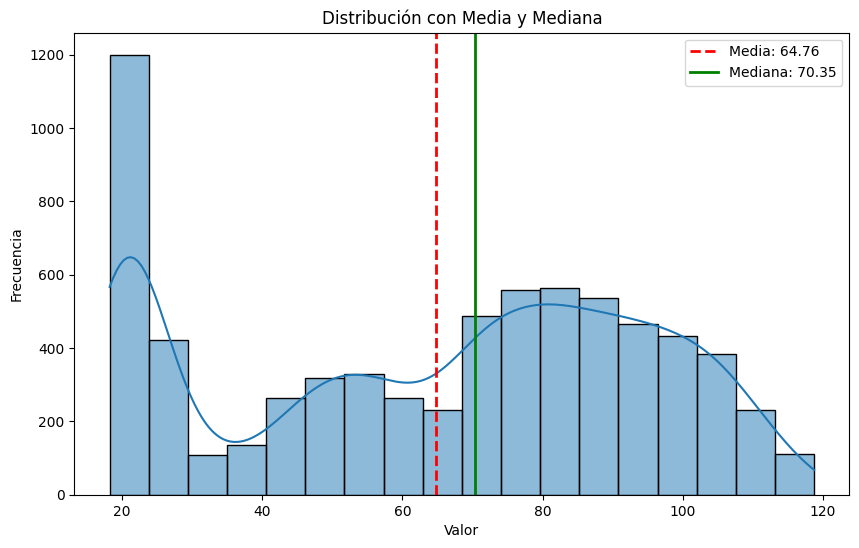

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Ejemplo: tu columna numérica
x = df['cargo_mensual'].astype(float)

plt.figure(figsize=(10,6))
sns.histplot(x, kde=True)

# Media y mediana
media = x.mean()
mediana = x.median()

# Líneas
plt.axvline(media, color='red', linestyle='--', linewidth=2, label=f"Media: {media:.2f}")
plt.axvline(mediana, color='green', linestyle='-', linewidth=2, label=f"Mediana: {mediana:.2f}")

plt.legend()
plt.title("Distribución con Media y Mediana")
plt.xlabel("Valor")
plt.ylabel("Frecuencia")
plt.show()


En la tabla vemos que el 30% de los clientes no tienen internet o tienen DSL servicios con un coste bajo:

In [ ]:
df_group = df.groupby(["tipo_internet", "servicio_telefono"]).agg(
    cargo_mensual_sum=("cargo_mensual", "sum"),
    cargo_mensual_mean=("cargo_mensual", "mean"),
    cantidad_clientes=("id_cliente", "count")
).reset_index()

# Total general
total_clientes = df_group["cantidad_clientes"].sum()

# Porcentaje
df_group["porcentaje"] = (df_group["cantidad_clientes"] / total_clientes) * 100

df_group




,tipo_internet,servicio_telefono,cargo_mensual_sum,cargo_mensual_mean,cantidad_clientes,porcentaje
0,DSL,No,28663.50,42.028592,682,9.683374
1,DSL,Yes,112001.85,64.405894,1739,24.691183
2,Fiber optic,Yes,283284.40,91.500129,3096,43.958540
3,No,Yes,32166.85,21.079194,1526,21.666903


# Experimentación.(Validación)
Comienzo del analisis principalmente se utilizaron graficos de Seaborn para validar y contestar las preguntas de las distintas hipotesis.

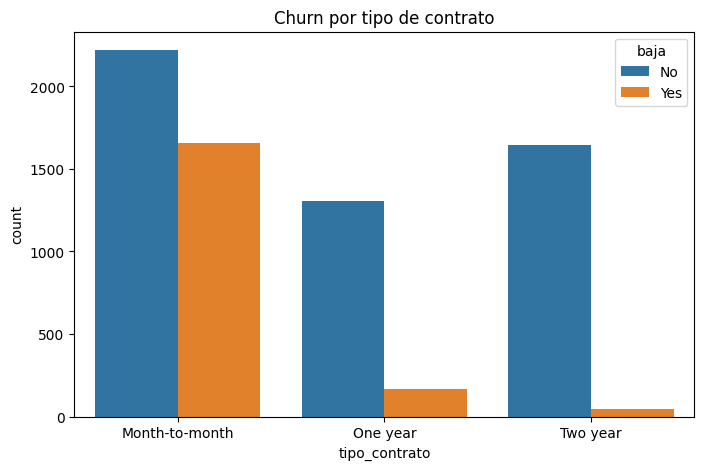

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x="tipo_contrato", hue="baja")
plt.title("Churn por tipo de contrato")
plt.show()

#### Hipótesis 1
 En el grafico que vemos arriba podemos vero como los clientes con contrato mensual tienen una proporción mucho mayor de baja en comparación con quienes tienen contratos de uno o dos años.
 Esta visualización apoya directamente la hipótesis H1 que suponía que los clientes con cargos mensuales son los que tienen una mayor probabilidad de baja.

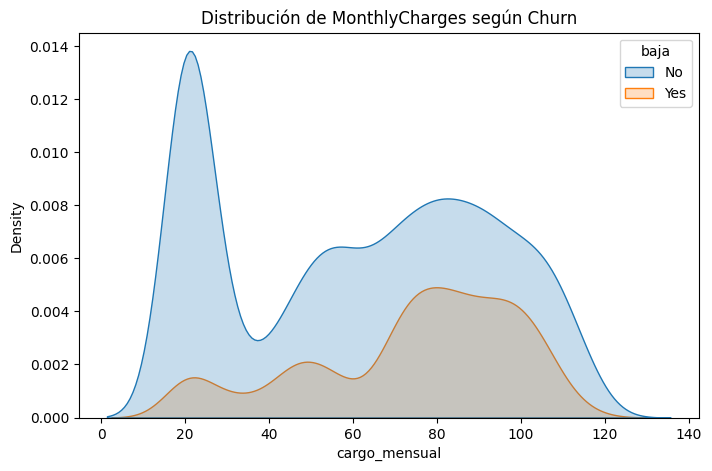

In [ ]:
#df["cargo_mensual"] = pd.to_numeric(df["cargo_mensual"], errors="coerce")
#df = df.dropna(subset=["cargo_mensual"])

plt.figure(figsize=(8,5))
sns.kdeplot(data=df, x="cargo_mensual", hue="baja", fill=True)
plt.title("Distribución de MonthlyCharges según Churn")
plt.show()


#### Hipótesis 2
En el grafico superior si bien no es categorico, vemos que hay relación entre la baja y los montos más altos, con lo cual claramente es una variables clave en los proximos pasos. Esto valida de alguna manera la hipótesis numero 2 que lo planteaba.

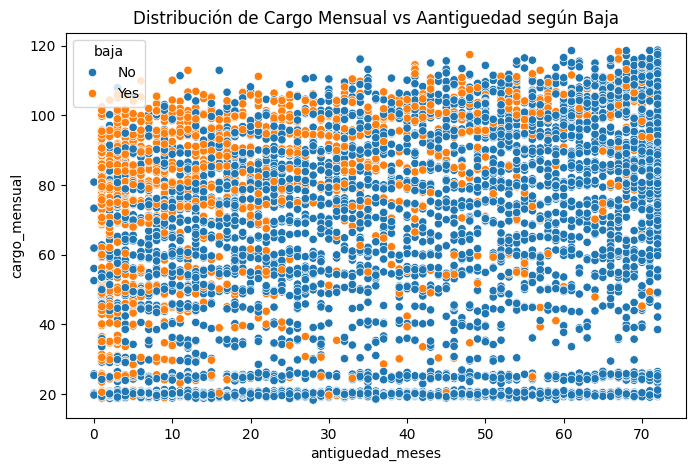

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x="antiguedad_meses", y="cargo_mensual", hue="baja")
plt.title("Distribución de Cargo Mensual vs Aantiguedad según Baja")
plt.show()



#### Hipótesis 3
*En el cuadro de arriba, podemos ver claramente como la baja del servicio se da mayormente con clientes de menor antiguedad y sobre todo cuando el cargo mensual es más alto. Este gráfico tambien apoya la hipótesis 2, viendo que a mayor antiguedad, es menos probables que un cliente se vaya*




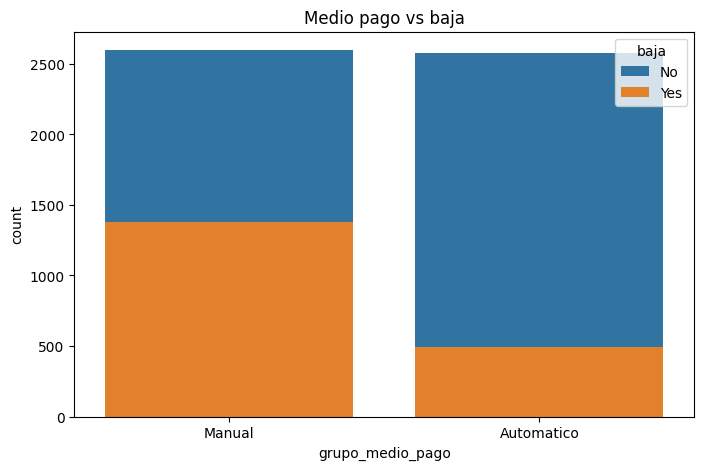

In [ ]:

plt.figure(figsize=(8,5))
sns.countplot(data=df, x="grupo_medio_pago", hue="baja", dodge=False)
plt.title("Medio pago vs baja")
plt.show()


#### Hipótesis 4

En el cuadrio superior, podemos ver como, si bien no es categorico, pero vemos una mayor baja de servicio o "Churn" en clientes cuyo medio de pago es manual.
Para esto creamos una columna nueva al dataset, donde agrupamos los 4 medios de pago existentes:

In [ ]:
df['medio_pago'].value_counts(normalize=True)*100

,proportion
medio_pago,
Electronic check,33.579441
Mailed check,22.887974
Bank transfer (automatic),21.922476
Credit card (automatic),21.610109


In [ ]:
df['grupo_medio_pago'].value_counts(normalize=True)*100

,proportion
grupo_medio_pago,
Manual,56.467414
Automatico,43.532586


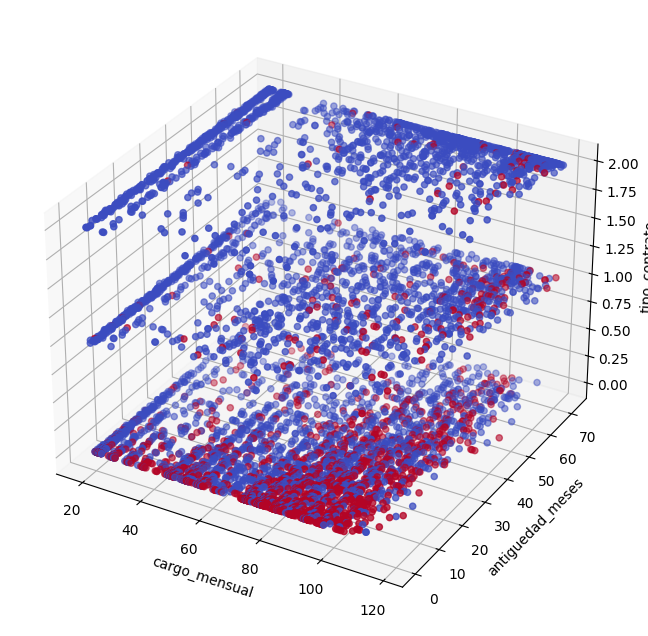

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(
    x['cargo_mensual'],
    x['antiguedad_meses'],
    x['tipo_contrato'],
    c=y,
    cmap='coolwarm'
)

ax.set_xlabel('cargo_mensual')
ax.set_ylabel('antiguedad_meses')
ax.set_zlabel('tipo_contrato')

plt.show()


#Entrega 2


In [ ]:
#pip install mlxtend --upgrade --no-deps

#### Coeficiente de variacion

Analiza la heterogeneidad del dataset o de la variable

cv <= 30% Homogeneo

cv > 30% <=70% Heterogeneos, por lo tanto la media no es representativa.

cv > 70% Son muy variables o Heterogeneos, por lo tanto la media no es representativa

In [ ]:
#coef_var = (df['antiguedad_meses'].std()/df['antiguedad_meses'].mean())*100
#coef_var = (df['cargo_mensual'].std()/df['cargo_mensual'].mean())*100
for variable in df.select_dtypes(include="number").columns:
  print(variable,(df[variable].std()/df[variable].mean())*100)


#print(coef_var)

adulto_mayor 227.3320086087057
antiguedad_meses 75.86842617906603
cargo_mensual 46.46272503762195
total_cargos 99.27608830344613


#### Features x
#### Target y

## Encoding

In [4]:
# importar librerias
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.plotting import plot_decision_regions
import warnings
warnings.filterwarnings("ignore")


In [5]:
#y = df[df['species']!='setosa']['species'].replace({'versicolor':0, 'virginica':1})

#df[df['species']!='setosa']['species'].replace({'versicolor':0, 'virginica':1}, inplace=True)

#y=df.species
#las etiquetas las debo pasar a números, en este caso tenemos un problema binario
#revisar más info en https://interactivechaos.com/es/manual/tutorial-de-machine-learning/la-funcion-getdummies

x = df[['cargo_mensual','antiguedad_meses','tipo_contrato']].copy()
x['tipo_contrato'] = x['tipo_contrato'].replace({'Month-to-month':0,'One year':1,'Two year':2})



#print(x)
# La siguiente funcion crea tantas columnas como clasificaciones tengas
#y = pd.get_dummies(df[['baja']])
# Convierto a ceros y unos Label Encoding. En este caso, para la libreria que vamos a usar de visualizacion, es mejor.
y = df['baja'].replace({'No': 0, 'Yes': 1})

#print(x)
print(type(y))
#y['baja'].value_counts(normalize=True)*100

<class 'pandas.core.series.Series'>


## Modelo

#### Entrenamiento

In [6]:
# Paso 1
# Importar las librerias del modelo
from sklearn.linear_model import LogisticRegression

# Paso 2
# Crear la instancia del modelo
clf = LogisticRegression()

# Paso 3
# Entrenar el modelo con los datos y la etiqueta, y solo una variable
#clf.fit(x, y['baja_Yes'])
clf.fit(x, y)

LogisticRegression()

In [7]:
y_pred = clf.predict(x)
y_pred


array([0, 0, 0, ..., 0, 1, 0])

In [8]:
y_proba_baja = clf.predict_proba(x)[:, 1]
y_proba_baja[:10]  # primeras 10

array([0.31302009, 0.09804628, 0.46638773, 0.04595345, 0.58609638,
       0.72345876, 0.53930617, 0.24756595, 0.59675583, 0.0374674 ])

In [9]:
#Probabiliad de baja
y_proba = clf.predict_proba(x)
y_proba


array([[0.68697991, 0.31302009],
       [0.90195372, 0.09804628],
       [0.53361227, 0.46638773],
       ...,
       [0.75983791, 0.24016209],
       [0.40562473, 0.59437527],
       [0.95247598, 0.04752402]])

In [14]:

# Que tan bien funciona, es laa proporción de predicciones correctas.
# Compara la prediccion vs el campo de baja, contra y
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y, y_pred)
accuracy


0.7875905154053671

In [11]:

#Saber cómo se equivoca?
#Cuántos No baja predijo bien
#Cuántos No baja los predijo como Baja
#Cuántos Baja predijo bien
#Cuántos Baja los predijo como No baja

from sklearn.metrics import confusion_matrix

confusion_matrix(y, y_pred)


array([[4631,  543],
       [ 953,  916]])

In [13]:
nuevo_cliente = [[70, 12,0]]  # ejemplo: $70, 12 meses de antigüedad
clf.predict(nuevo_cliente)
clf.predict_proba(nuevo_cliente)

array([[0.50769642, 0.49230358]])